# Description:

* number libraries = 1
* isotope incorp: 0% for all taxa (baseline)

## Goals:

* assess how absolute abundance alters the distribution of amplicon fragments
  * abs abund values:
    * 1e9, 5e9, 1e10

# Init

In [6]:
workDir = '/home/nick/notebook/SIPSim/dev/bac_genome_all/nl1/absAbund/'
copyDir = '/home/nick/notebook/SIPSim/dev/bac_genome_all/nl1/fragLen/'
baseDir = '/home/nick/notebook/SIPSim/dev/bac_genome_all/'
SIPSimExe = '/home/nick/notebook/SIPSim/SIPSim'

In [2]:
import os,sys
import numpy as np
import pandas as pd
from ggplot import *
import matplotlib.pyplot as plt

In [3]:
%load_ext rpy2.ipython
%matplotlib inline

In [4]:
%%R
library(ggplot2)
library(dplyr)
library(tidyr)
library(gridExtra)
library(data.table)


Attaching package: ‘dplyr’

The following object is masked from ‘package:stats’:

    filter

The following objects are masked from ‘package:base’:

    intersect, setdiff, setequal, union

Loading required package: grid
data.table 1.9.4  For help type: ?data.table
*** NB: by=.EACHI is now explicit. See README to restore previous behaviour.

Attaching package: ‘data.table’

The following objects are masked from ‘package:dplyr’:

    between, last



In [5]:
if not os.path.isdir(workDir):
    os.mkdir(workDir)

# Simulating gradient communities

In [7]:
comm_file = 'comm-n1-pow.txt'
comm_file_cp1 = os.path.join(copyDir, comm_file)
comm_file_cp2 = os.path.join(workDir, comm_file)
!cp $comm_file_cp1 $comm_file_cp2

[1] 100
     Min.   1st Qu.    Median      Mean   3rd Qu.      Max. 
0.0000575 0.0248400 0.0554400 0.0826400 0.1203000 0.7323000 
[1] 12727.77


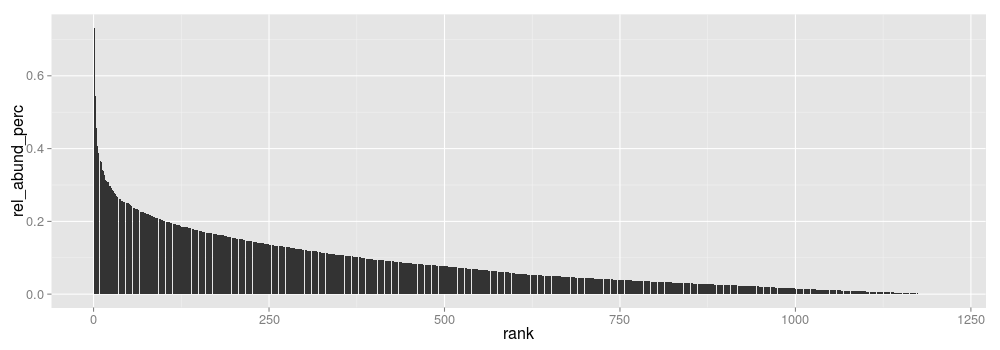

In [10]:
%%R -i workDir -w 1000 -h 350 
# plotting the abundance distribution
setwd(workDir)

tbl = read.delim('comm-n1-pow.txt', sep='\t')

print(sum(tbl$rel_abund_perc))
print(summary(tbl$rel_abund_perc))
print(max(tbl$rel_abund_perc) / min(tbl$rel_abund_perc))

# plotting
ggplot(tbl, aes(rank, rel_abund_perc)) +
    geom_bar(stat='identity') +
    theme( text = element_text(size=16))

# Simulating isotope incorporation

In [11]:
comm_file = 'incorp-n1-pow.txt'
comm_file_cp1 = os.path.join(copyDir, comm_file)
comm_file_cp2 = os.path.join(workDir, comm_file)
!cp $comm_file_cp1 $comm_file_cp2

In [126]:
!cd $workDir; \
     $SIPSimExe isoIncorp comm-n1-pow.txt incorp.config > incorp-n1-pow.txt

In [12]:
!cd $workDir; head incorp-n1-pow.txt

library	taxon_name	distribution_index	distribution	weight	param	param_value
1	Isosphaera_pallida_ATCC_43644	1	uniform	1.0	start	8.41134849099e-07
1	Isosphaera_pallida_ATCC_43644	1	uniform	1.0	end	3.86213774981e-06
1	Caulobacter_crescentus_NA1000	1	uniform	1.0	start	4.7095790248e-06
1	Caulobacter_crescentus_NA1000	1	uniform	1.0	end	7.22092768592e-06
1	Candidatus_Liberibacter_solanacearum_CLso-ZC1	1	uniform	1.0	start	7.47050104396e-06
1	Candidatus_Liberibacter_solanacearum_CLso-ZC1	1	uniform	1.0	end	3.75886172964e-06
1	Rickettsia_parkeri_str_Portsmouth	1	uniform	1.0	start	7.79689107526e-06
1	Rickettsia_parkeri_str_Portsmouth	1	uniform	1.0	end	6.51117262806e-06
1	Chlamydophila_abortus_S26_3	1	uniform	1.0	start	8.31779429734e-06


# Simulating gradient fractions

In [13]:
comm_file = 'fracs-n1-pow.txt'
comm_file_cp1 = os.path.join(copyDir, comm_file)
comm_file_cp2 = os.path.join(workDir, comm_file)
!cp $comm_file_cp1 $comm_file_cp2

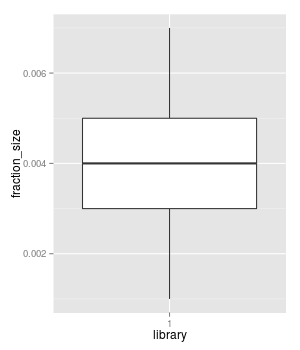

In [14]:
%%R -i workDir -h 350 -w 300 
# plotting the abundance distribution
setwd(workDir)

tbl = read.delim('fracs-n1-pow.txt', sep='\t')
tbl$library = as.character(tbl$library)

#tbl.m = tbl %>% gather(min_max, BD, BD_min:BD_max )
#ggplot(tbl.m, aes(fraction, BD, group=fraction, color=min_max)) +
#    geom_point() +
#    geom_line(color='black')


ggplot(tbl, aes(library, fraction_size)) +
    geom_boxplot()

# Simulating amplicon fragments & calculating GC

## Skewed-normal fragment length distribution 

* default params 
  * I'm explicitly setting the defaults in case they change later
  * no real size restrictions

In [15]:
comm_file = 'ampFragGC_skewN90-25-n5-nS.pkl'
comm_file_cp1 = os.path.join(copyDir, comm_file)
comm_file_cp2 = os.path.join(workDir, comm_file)
!cp $comm_file_cp1 $comm_file_cp2

In [200]:
#!cd $workDir;\
#    $SIPSimExe fragGC \
#    $baseDir/genomes/genome_index.txt \
#    --fp $baseDir/genomes/ \
#    --fr $baseDir/515Fm-927Rm.fna \
#    --fld skewed-normal,9000,2500,-5 \
#    --flr 500,None \
#    --nf 10000 \
#    --np 24 \
#    2> ampFragGC_skewN90-25-n5-nS.log \
#    > ampFragGC_skewN90-25-n5-nS.pkl

## Creating OTU table: abs-abund = 1e9

In [ ]:
comm_file = 'OTU-n1-pow_skewN90-25-n5-nS_A1e9.txt'
comm_file_cp1 = os.path.join(copyDir, comm_file)
comm_file_cp2 = os.path.join(workDir, comm_file)
!cp $comm_file_cp1 $comm_file_cp2

## Creating OTU table: abs-abund = 5e9

In [ ]:
!cd $workDir; \
    $SIPSimExe OTU_table \
    ampFragGC_skewN90-25-n5-nS.pkl \
    comm-n1-pow.txt \
    incorp-n1-pow.txt \
    fracs-n1-pow.txt \
    --abs_abund 5e9 \
    2> OTU-n1-pow_skewN90-25-n5-nS_A5e9.log \
    > OTU-n1-pow_skewN90-25-n5-nS_A5e9.txt

## Creating OTU table: abs-abund = 1e10

In [ ]:
!cd $workDir; \
    $SIPSimExe OTU_table \
    ampFragGC_skewN90-25-n5-nS.pkl \
    comm-n1-pow.txt \
    incorp-n1-pow.txt \
    fracs-n1-pow.txt \
    --abs_abund 1e10 \
    2> OTU-n1-pow_skewN90-25-n5-nS_A1e10.log \
    > OTU-n1-pow_skewN90-25-n5-nS_A1e10.txt

## Plotting OTU tables


In [41]:
%%R -i workDir

# loading file
inFiles = c('OTU-n1-pow_skewN90-25-n5-nS_A1e9.txt',
            'OTU-n1-pow_skewN90-25-n5-nS_A5e9.txt',
            'OTU-n1-pow_skewN90-25-n5-nS_A1e10.txt')

inFiles = sapply(inFiles, function(x){
            paste(c(workDir, x), collapse='/')
    })

tbls = list()
for (fileName in names(inFiles)){
    tbls[[fileName]] = read.csv(fileName, sep='\t')
    }
tbl = do.call(rbind, tbls)
tbl$abs_abund = as.numeric(gsub('.+-nS_A|\\.txt\\.[0-9]+', '', rownames(tbl)))

tbl = tbl %>% 
    separate(fractions, into = c('BD_min','BD_max'), sep='-', convert=TRUE) %>%
    filter(BD_min != 1.795)

In [54]:
%%R

# summarizing counts (should be approx. total abundance)
tbl %>%
    group_by(abs_abund, BD_min) %>%
    summarize(sum(count)) %>% as.data.frame

    abs_abund BD_min sum(count)
1       1e+09  1.660       1101
2       1e+09  1.663       7789
3       1e+09  1.666      50290
4       1e+09  1.669     330271
5       1e+09  1.673     674249
6       1e+09  1.676    6955405
7       1e+09  1.682    8394521
8       1e+09  1.684   25207953
9       1e+09  1.687   42738110
10      1e+09  1.690  102530501
11      1e+09  1.695  117370592
12      1e+09  1.700  109739671
13      1e+09  1.705   87874105
14      1e+09  1.710   69143422
15      1e+09  1.714   81670458
16      1e+09  1.718  157077809
17      1e+09  1.725   21894577
18      1e+09  1.726   58184491
19      1e+09  1.729   38748596
20      1e+09  1.732   23475417
21      1e+09  1.738     948148
22      1e+09  1.745       3280
23      1e+09  1.746       4563
24      1e+09  1.752        423
25      1e+09  1.759          8
26      1e+09  1.760         14
27      1e+09  1.763          3
28      1e+09  1.766          1
29      1e+09  1.771          0
30      1e+09  1.775          0
31      

In [56]:
%%R
## BD for G+C of 0 or 100
BD.GCp0 = 0 * 0.098 + 1.66
BD.GCp100 = 1 * 0.098 + 1.66

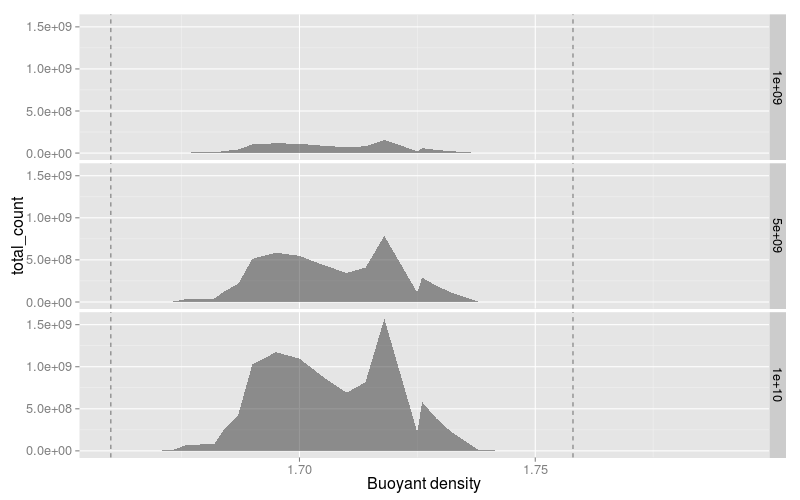

In [59]:
%%R -w 800 -h 500
# plotting absolute abundances

tbl.s = tbl %>%
    group_by(abs_abund, BD_min) %>%
    summarize(total_count = sum(count))


## plot
p = ggplot(tbl.s, aes(BD_min, total_count)) +
    geom_area(stat='identity', alpha=0.5, position='dodge') +
    geom_vline(xintercept=c(BD.GCp0, BD.GCp100), linetype='dashed', alpha=0.5) +
    labs(x='Buoyant density') +
    facet_grid(abs_abund ~ .) +
    theme( 
        text = element_text(size=16) 
    )
p

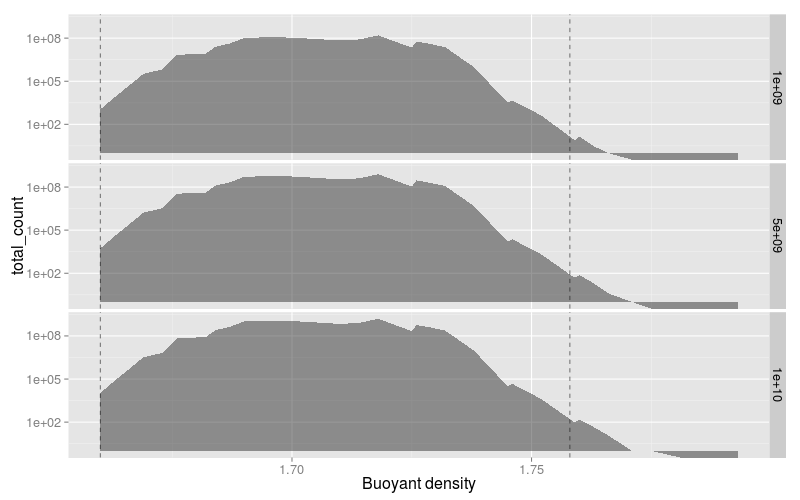

In [60]:
%%R -w 800 -h 500

p + scale_y_log10()

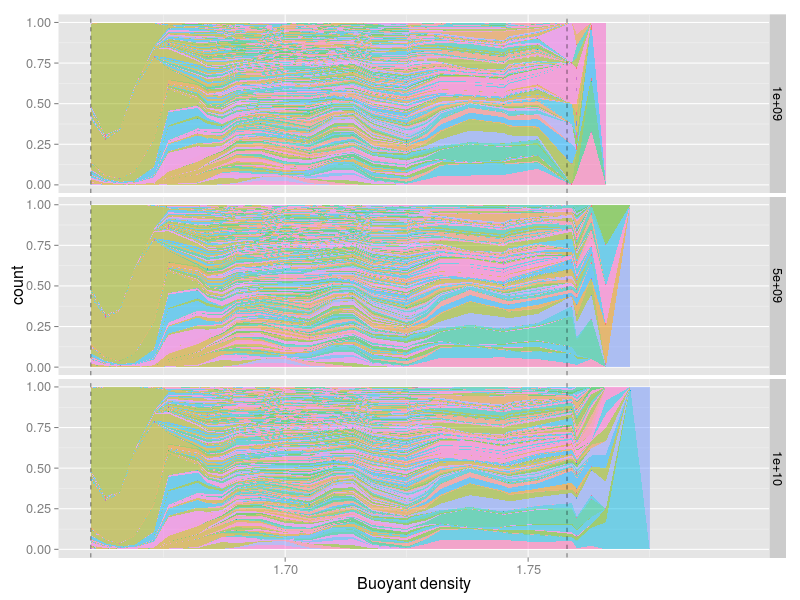

In [61]:
%%R -w 800 -h 600
# plotting relative abundances

## plot
p = ggplot(tbl, aes(BD_min, count, fill=taxon, group=taxon)) +
    geom_area(stat='identity', alpha=0.5, position='fill') +
    geom_vline(xintercept=c(BD.GCp0, BD.GCp100), linetype='dashed', alpha=0.5) +
    labs(x='Buoyant density') +
    facet_grid(abs_abund ~ .) +
    theme( 
        text = element_text(size=16),
        legend.position = 'none'
    )
p

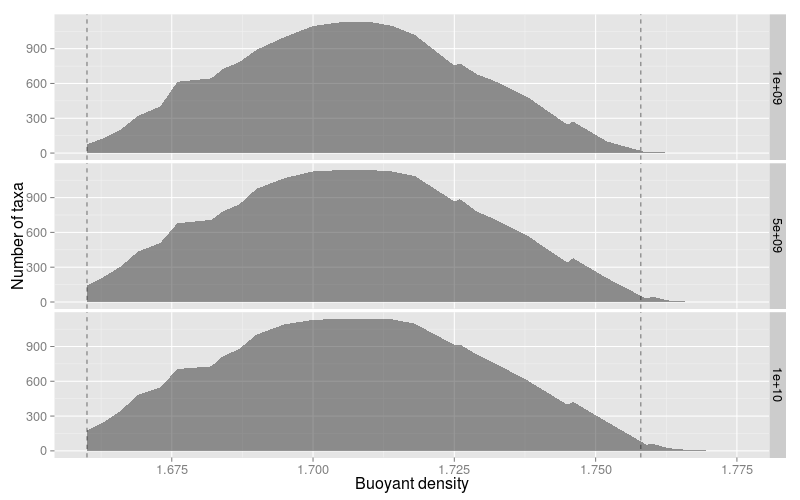

In [64]:
%%R -w 800 -h 500
# plotting number of taxa at each BD

tbl.nt = tbl %>%
    filter(count > 0) %>%
    group_by(abs_abund, BD_min) %>%
    summarize(n_taxa = n())

## plot
p = ggplot(tbl.nt, aes(BD_min, n_taxa)) +
    geom_area(stat='identity', alpha=0.5, position='dodge') +
    geom_vline(xintercept=c(BD.GCp0, BD.GCp100), linetype='dashed', alpha=0.5) +
    labs(x='Buoyant density', y='Number of taxa') +
    facet_grid(abs_abund ~ .) +
    theme( 
        text = element_text(size=16),
        legend.position = 'none'
    )
p

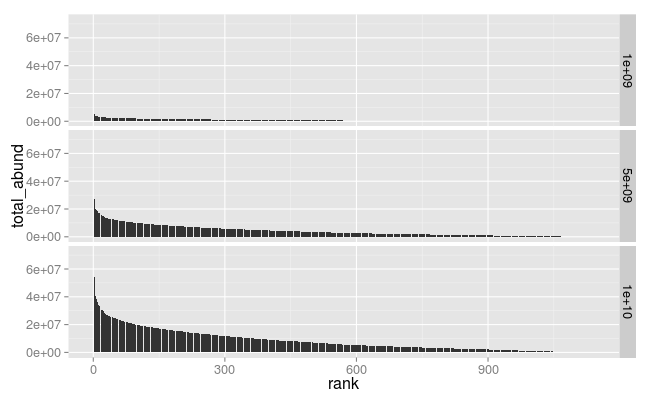

In [69]:
%%R -h 400 -w 650

tbl.s = tbl %>%
    group_by(abs_abund, taxon) %>%
    summarize( total_abund = sum(count) ) %>%
    mutate(rank = min_rank(desc(total_abund))) %>%
    arrange(rank)

ggplot(tbl.s, aes(rank, total_abund)) +
    geom_bar(stat='identity') +
    facet_grid(abs_abund ~ .) +
    theme( text = element_text(size=16))

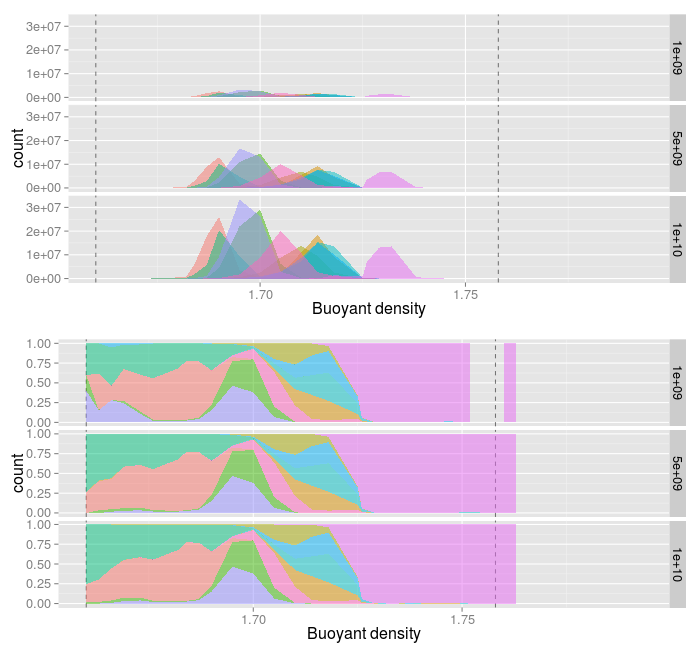

In [73]:
%%R -w 700 -h 650
# plotting most abundant taxa

tbl.s.a10 = tbl.s %>%
    filter(rank <= 10)

tbl.a10 = tbl %>%
    filter(taxon %in% tbl.s.a10$taxon)

## plot
p = ggplot(tbl.a10, aes(BD_min, count, fill=taxon, group=taxon)) +
    geom_vline(xintercept=c(BD.GCp0, BD.GCp100), linetype='dashed', alpha=0.5) +
    labs(x='Buoyant density') +
    facet_grid(abs_abund ~ .) +
    theme( 
        text = element_text(size=16),
        legend.position = 'none'
    )
p1 = p + geom_area(stat='identity', alpha=0.5, position='dodge') 
p2 = p + geom_area(stat='identity', alpha=0.5, position='fill') 

grid.arrange(p1, p2, ncol=1)

## Measuring the BD range vs total abundance for each taxon

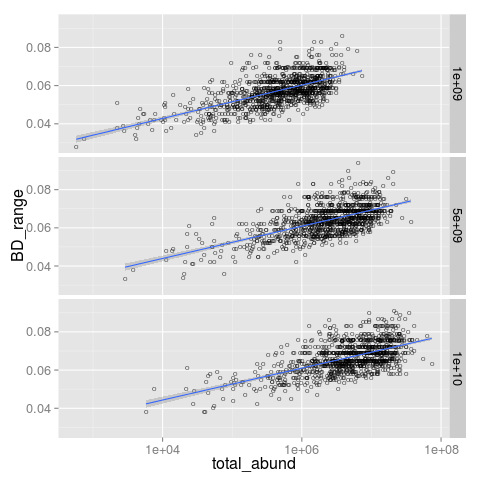

In [100]:
%%R
tbl.bdr = tbl %>%
    mutate(
           GC_min = (BD_min - 1.66) / 0.098 * 100,
           GC_max = (BD_max - 1.66) / 0.098 * 100
          ) %>%
    group_by(abs_abund, taxon) %>%
    filter(count > 0) %>%
    summarize(
              GC_range = max(GC_max) - min(GC_min),
              BD_range = max(BD_max) - min(BD_min),
              total_abund = sum(count)
            )  

# plotting 
ggplot(tbl.bdr, aes(total_abund, BD_range)) +
    geom_point(alpha=0.75, shape='O') +
    geom_smooth(method='lm') +
    scale_x_log10() +
    facet_grid(abs_abund ~ .) +
    theme(
        text = element_text(size=16)
        )

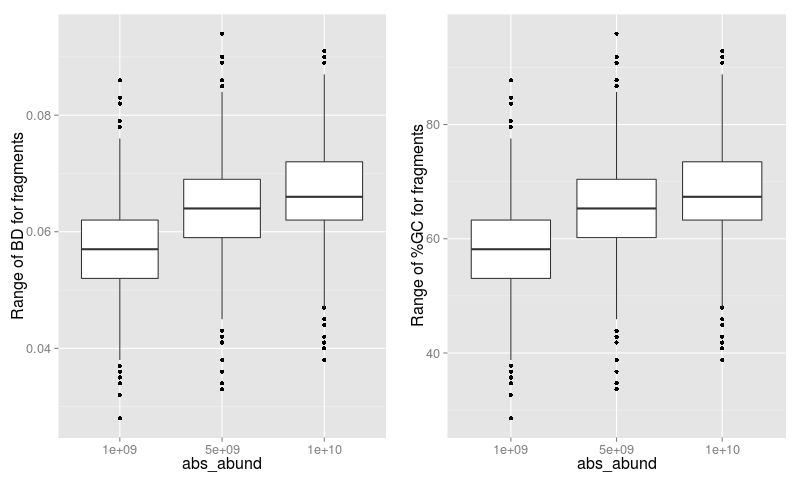

In [101]:
%%R -w 800
# plotting boxplots
tbl.bdr$abs_abund = as.character(tbl.bdr$abs_abund)
tbl.bdr$abs_abund = factor(tbl.bdr$abs_abund, levels=c('1e+09','5e+09','1e+10'))

p1 = ggplot(tbl.bdr, aes(abs_abund, BD_range)) +
    geom_boxplot() +
    labs(y='Range of BD for fragments') +
    theme(
        text = element_text(size=16)
        )

p2 = ggplot(tbl.bdr, aes(abs_abund, GC_range)) +
    geom_boxplot() +
    labs(y='Range of %GC for fragments') +
    theme(
        text = element_text(size=16)
        )

grid.arrange(p1, p2, ncol=2)

In [102]:
%%R
tbl.bdr %>%
    group_by(abs_abund) %>%
    summarize(
        median_BD_range = median(BD_range),
        median_GC_range = median(GC_range)
    )

Source: local data frame [3 x 3]

  abs_abund median_BD_range median_GC_range
1     1e+09           0.057        58.16327
2     5e+09           0.064        65.30612
3     1e+10           0.066        67.34694


__Notes:__

* Altering the abs abundance from 1e9 to 1e10 increases the %G+C range by ~10 %GC